In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '../examples/PyMPDATA_examples/Arabas_and_Farhat_2020/data/'

In [41]:
df = pd.DataFrame(columns=['advector', 'advectee', 'flux'])

In [91]:
# Load the data
data = []
for i in range(17):
    advector = np.load(data_dir + 'advector_' + str(i) + '.npy')
    advectee = np.load(data_dir + 'advectee_' + str(i) + '.npy')
    flux = np.load(data_dir + 'corrective_flux_' + str(i) + '.npy')
    data.append([advector, advectee, -flux])


In [92]:
print(f"advector {data[0][0].shape}")
print(f"advectee {data[0][1].shape}")
print(f"flux {data[0][2].shape}")


advector (43,)
advectee (44,)
flux (43,)


In [93]:
data[0]

[array([       nan, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399,        nan]),
 array([99.60079893, 99.60079893, 99.60079893, 99.60079893, 99.60079893,
        99.60079893, 99.60079893, 99.60079893, 99.60079893, 99.60079893,
        99.60079893, 99.60079893, 99.60079893, 99.60079893, 99.60079893,
        99.60079893, 99.60079893, 96.62221125, 88.19297639, 75.09185429,
        59.89158235, 42.08549337, 18.66600857, 12.26970178,  0.        ,
         0.        ,  0.        ,  0.        

In [94]:
stencils= []
stencil_length = 3
# ffill and bfill nan values
for i in range(17):
    data[i][1] = pd.DataFrame(data[i][1]).fillna(method='ffill').values
    data[i][0] = pd.DataFrame(data[i][0]).fillna(method='ffill').values
    data[i][2] = pd.DataFrame(data[i][2]).fillna(method='ffill').values
    data[i][1] = pd.DataFrame(data[i][1]).fillna(method='bfill').values
    data[i][0] = pd.DataFrame(data[i][0]).fillna(method='bfill').values
    data[i][2] = pd.DataFrame(data[i][2]).fillna(method='bfill').values

In [95]:
max_advector = max(data[:][0].max() for data in data)
max_advectee = max(data[:][1].max() for data in data)
max_flux = max(data[:][2].max() for data in data)
print(f"max_advector: {max_advector}, max_advectee: {max_advectee}, max_flux: {max_flux}")
for i in range(17):
    advector, advectee, flux = data[i]
    max_advectee = max(max_advectee, np.max(advectee))
    max_advector = max(max_advector, np.max(advector))
    max_flux = max(max_flux, np.max(flux))
    for j in range(0, len(data[i][1])-1):
        print(f"i: {i}, j: {j}, {list(range(j-1, j+2))}, {list(range(j-1, j+1))}, {j}")
        advectee_stencil = advectee[j-1:j+1]
        advector_stencil = advector[j-1:j+2]
        flux_stencil = flux[j]
        if np.isnan(advectee_stencil).any() or np.isnan(advector_stencil).any() or np.isnan(flux_stencil).any():
            continue
        try:
            assert advectee_stencil.shape[0] == stencil_length -1
            assert advector_stencil.shape[0] == stencil_length
        except:
            print(advectee_stencil.shape[0], advector_stencil.shape[0])
            print(advectee_stencil)
            print(advector_stencil)
            print(flux_stencil)
            print()
            continue
        # if any of the values are nan, skip this stencil
        advector_stencil = advector_stencil / max_advector
        # flatten the stencil
        advector_stencil = advector_stencil.flatten()
        advectee_stencil = advectee_stencil / max_advectee
        advectee_stencil = advectee_stencil.flatten()
        flux_stencil = flux_stencil / max_flux
        # flatten the stencil
        flux_stencil = flux_stencil.flatten()
        input_stencil = np.concatenate((advector_stencil, advectee_stencil), axis=0)
        
        stencils.append((input_stencil, flux_stencil[0]))

max_advector: 0.5337839906566905, max_advectee: 99.60079893523, max_flux: 2.8469085328715487
i: 0, j: 0, [-1, 0, 1], [-1, 0], 0
0 0
[]
[]
[-0.]

i: 0, j: 1, [0, 1, 2], [0, 1], 1
i: 0, j: 2, [1, 2, 3], [1, 2], 2
i: 0, j: 3, [2, 3, 4], [2, 3], 3
i: 0, j: 4, [3, 4, 5], [3, 4], 4
i: 0, j: 5, [4, 5, 6], [4, 5], 5
i: 0, j: 6, [5, 6, 7], [5, 6], 6
i: 0, j: 7, [6, 7, 8], [6, 7], 7
i: 0, j: 8, [7, 8, 9], [7, 8], 8
i: 0, j: 9, [8, 9, 10], [8, 9], 9
i: 0, j: 10, [9, 10, 11], [9, 10], 10
i: 0, j: 11, [10, 11, 12], [10, 11], 11
i: 0, j: 12, [11, 12, 13], [11, 12], 12
i: 0, j: 13, [12, 13, 14], [12, 13], 13
i: 0, j: 14, [13, 14, 15], [13, 14], 14
i: 0, j: 15, [14, 15, 16], [14, 15], 15
i: 0, j: 16, [15, 16, 17], [15, 16], 16
i: 0, j: 17, [16, 17, 18], [16, 17], 17
i: 0, j: 18, [17, 18, 19], [17, 18], 18
i: 0, j: 19, [18, 19, 20], [18, 19], 19
i: 0, j: 20, [19, 20, 21], [19, 20], 20
i: 0, j: 21, [20, 21, 22], [20, 21], 21
i: 0, j: 22, [21, 22, 23], [21, 22], 22
i: 0, j: 23, [22, 23, 24], [22, 23], 23

In [96]:
stencils

[(array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]),
  -3.075542771716486e-17),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 0.0632915, 1.       , 1.       ]), -0.0),
 (array([0.0632915, 0.0632915, 

In [97]:
df = pd.DataFrame(stencils, columns=['input', 'flux'])


In [98]:
df

,input,flux
0,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00
1,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00
2,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00
3,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00
4,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00
...,...,...
692,"[-0.8734169954582572, 0.9999999999995801, 0.06...",3.317446e-16
693,"[0.9999999999995801, 0.06329150227066135, 0.06...",-1.961372e-17
694,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00
695,"[0.06329150227066135, 0.06329150227066135, 0.0...",-0.000000e+00


In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [100]:
model = keras.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [113]:
# split the data, last 1/17 of the data is the test data
# shuffle the data after splitting
split = int(len(df) * 16/17)
X_train = df['input'].values[:split]
y_train = df['flux'].values[:split]
X_test = df['input'].values[split:]
y_test = df['flux'].values[split:]
X_train, y_train = np.stack(X_train), np.stack(y_train)
X_test, y_test = np.stack(X_test), np.stack(y_test)

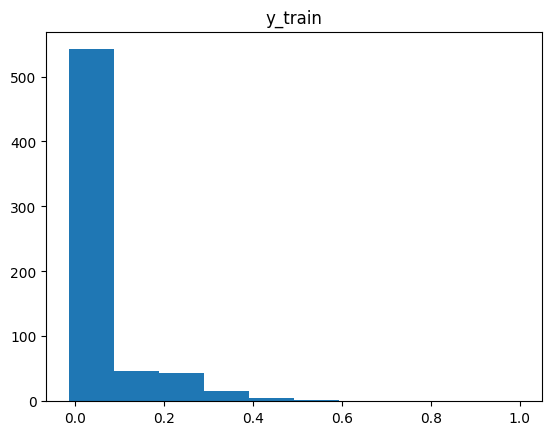

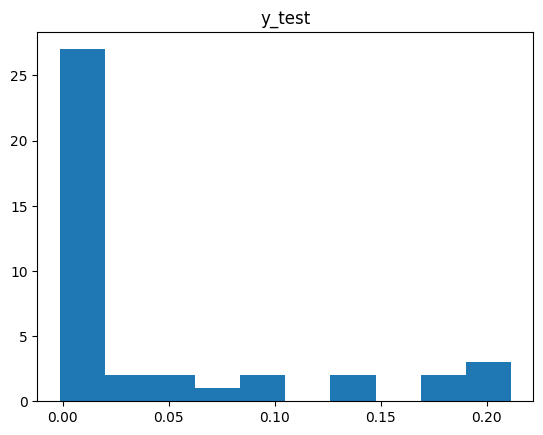

In [115]:
plt.hist(y_train)
plt.title('y_train')
plt.show()
plt.hist(y_test)
plt.title('y_test')
plt.show()

In [116]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 11

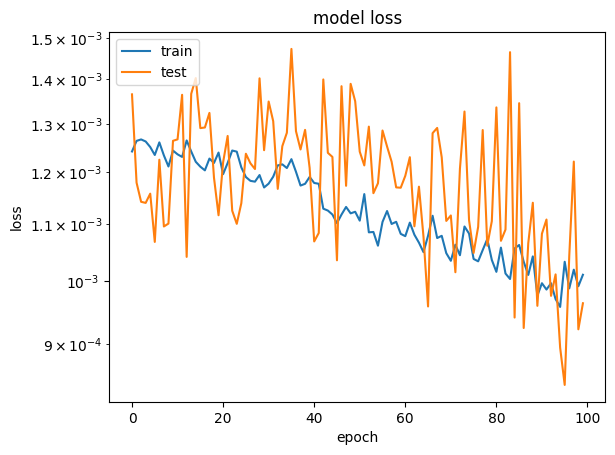

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.yscale('log')
plt.show()

2/2 [==============================] - 0s 8ms/step


(array([ 8., 20.,  2.,  3.,  1.,  1.,  2.,  1.,  2.,  1.]),
 array([-0.03645953, -0.00129673,  0.03386607,  0.06902886,  0.10419166,
         0.13935445,  0.17451726,  0.20968005,  0.24484284,  0.28000563,
         0.31516844]),
 <BarContainer object of 10 artists>)

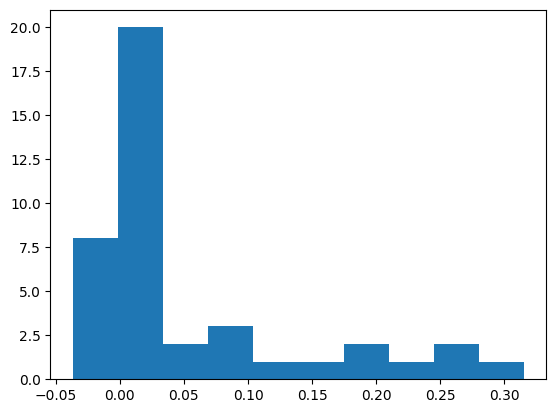

In [118]:
outputs = model.predict(X_test)
plt.hist(outputs)

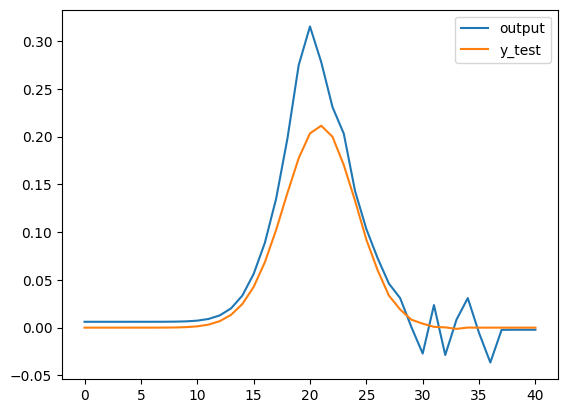

In [120]:
# merge the outputs into one vector
output = np.concatenate(outputs)
plt.plot(output)
plt.plot(y_test)
plt.legend(['output', 'y_test'])
plt.show()

In [121]:
def train_model(model, df, split_idx, epochs=100):
    X_train = df['input'].values[:split_idx]
    y_train = df['flux'].values[:split_idx]
    X_test = df['input'].values[split_idx:]
    y_test = df['flux'].values[split_idx:]
    X_train, y_train = np.stack(X_train), np.stack(y_train)
    X_test, y_test = np.stack(X_test), np.stack(y_test)
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return model, history

In [122]:
def visualize_training(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.yscale('log')
    plt.show()

In [123]:
def visualize_output(model, df, split_idx):
    X_test = df['input'].values[split_idx:]
    y_test = df['flux'].values[split_idx:]
    X_test, y_test = np.stack(X_test), np.stack(y_test)
    outputs = model.predict(X_test)
    output = np.concatenate(outputs)
    plt.plot(output)
    plt.plot(y_test)
    plt.legend(['output', 'y_test'])
    plt.show()

In [124]:
def get_model(n_hidden_layers, n_neurons, n_inputs=5):
    model = keras.Sequential()
    # add the input layer
    model.add(layers.Dense(n_neurons, activation='relu', input_shape=(n_inputs,)))
    for i in range(n_hidden_layers):
        model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.0392 - val_loss: 0.0110
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0038
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0026
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0023
Epoch 11

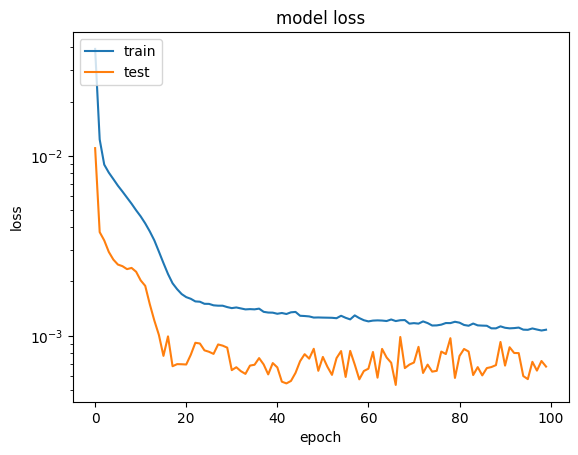

2/2 [==============================] - 0s 0s/step


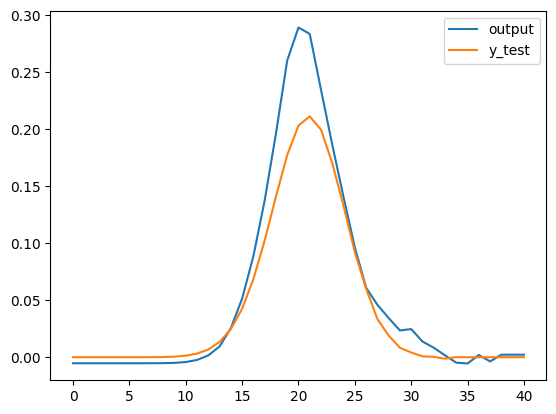

In [125]:
model2 = get_model(n_hidden_layers=2, n_neurons=10)
model2, history2 = train_model(model2, df, split_idx=split, epochs=100)
visualize_training(history2)
visualize_output(model2, df, split)

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.0094 - val_loss: 0.0036
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 8.7730e-04
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 9.8445e-04
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 7.1634e-04
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 7.8

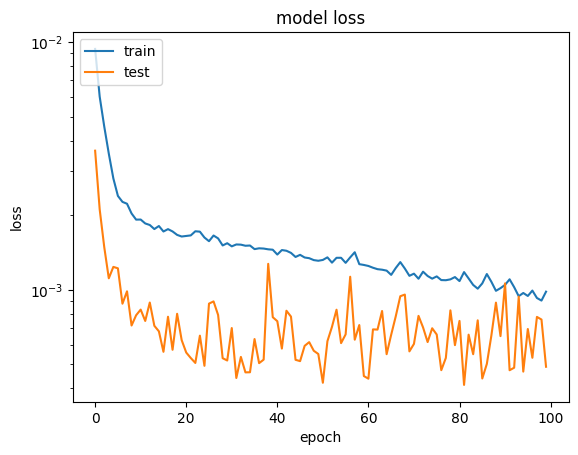

2/2 [==============================] - 0s 8ms/step


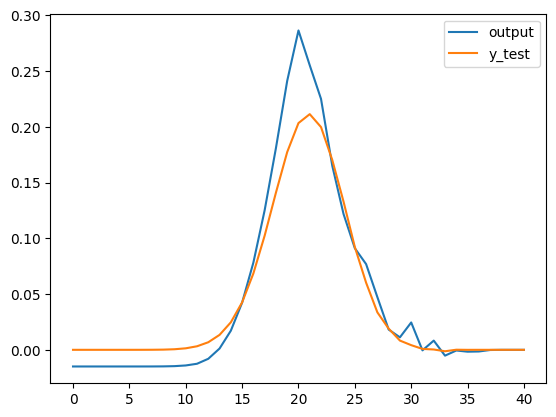

In [126]:
model3 = get_model(n_hidden_layers=3, n_neurons=10)
model3, history3 = train_model(model3, df, split_idx=split, epochs=100)
visualize_training(history3)
visualize_output(model3, df, split)

Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 0.0181 - val_loss: 0.0074
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.0055
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0033
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 9.3584e-04
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 6.2612e-04
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 5.0043e-04
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 8.2973e-04
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 8.7361e-04
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0021 - val_l

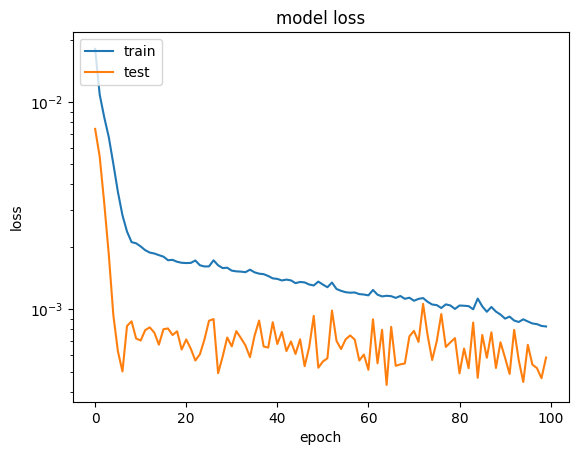

2/2 [==============================] - 0s 4ms/step


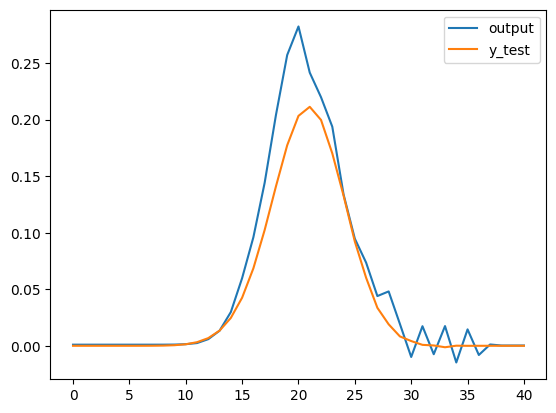

In [127]:
model4 = get_model(n_hidden_layers=2, n_neurons=15)
model4, history4 = train_model(model4, df, split_idx=split, epochs=100)
visualize_training(history4)
visualize_output(model4, df, split)